# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.014403000000000004
Average number of iterations is 161.483.


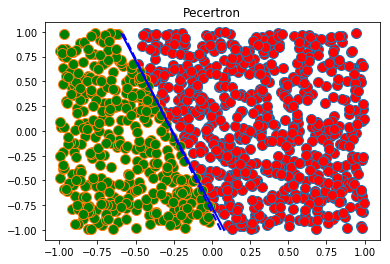

In [4]:
from perceptron import perceptron

def get_err(feas, labels, w):
    test_out = np.sign(np.dot(w.T, feas))
    test_out[test_out == 0] = -1
    mask = test_out == np.squeeze(labels)
    right_num = np.sum(mask)
    acc = right_num/feas.shape[1]
    return 1-acc

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000 # number of test data
E_train = 0
E_test = 0
total_iters = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    w_g, iters = perceptron(X[:, :nTrain], y[:, :nTrain])
    total_iters += iters
    # Compute training, testing error
    feas_train = np.vstack((np.ones((1, nTrain)), X[:, :nTrain]))
    labels_train = np.squeeze(y[:, :nTrain])
    E_train += get_err(feas_train, labels_train, w_g)
    
    feas_test = np.vstack((np.ones((1, nTest)), X[:, nTrain:]))
    labels_test = np.squeeze(y[:, nTrain:])
    E_test += get_err(feas_test, labels_test, w_g)
    # Sum up number of iterations
E_train, E_test, avgIter = E_train/nRep, E_test/nRep, total_iters/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [4]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


KeyboardInterrupt: 

### Part3: Linear Regression

E_train is 0.03864000000000007, E_test is 0.04872700000000004


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

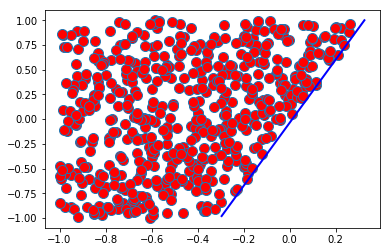

In [14]:
from linear_regression import linear_regression

def get_err_LR(feas, labels, w):
    labels[labels==-1] = 0
    test_out = np.dot(w.T, feas)
    pred = np.argmax(test_out, axis = 0)
    mask = pred == np.squeeze(labels)
    right_num = np.sum(mask)
    acc = right_num/feas.shape[1]
    return 1-acc

nRep = 1000  # number of replicates 1000
nTrain = 100 # number of training data
nTest = 1000 # number of test data
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    w_g = linear_regression(X[:, :nTrain], y[:, :nTrain])
    # Compute training, testing error    
    feas_train = np.vstack((np.ones((1, nTrain)), X[:, :nTrain]))
    labels_train = np.squeeze(y[:, :nTrain])
    E_train += get_err_LR(feas_train, labels_train, w_g)
    
    feas_test = np.vstack((np.ones((1, nTest)), X[:, nTrain:]))
    labels_test = np.squeeze(y[:, nTrain:])
    E_test += get_err_LR(feas_test, labels_test, w_g)
    # Sum up number of iterations
E_train, E_test = E_train/nRep, E_test/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression');

## Part4: Linear Regression: noisy

E_train is 0.13161000000000006, E_test is 0.14380199999999999


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

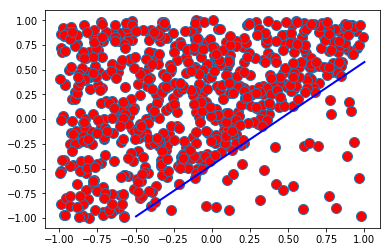

In [6]:

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 1000 # number of test data
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, noisy=True)
    w_g = linear_regression(X[:, :nTrain], y[:, :nTrain])
    # Compute training, testing error    
    feas_train = np.vstack((np.ones((1, nTrain)), X[:, :nTrain]))
    labels_train = np.squeeze(y[:, :nTrain])
    E_train += get_err_LR(feas_train, labels_train, w_g)
    
    feas_test = np.vstack((np.ones((1, nTest)), X[:, nTrain:]))
    labels_test = np.squeeze(y[:, nTrain:])
    E_test += get_err_LR(feas_test, labels_test, w_g)
    # Sum up number of iterations
E_train, E_test = E_train/nRep, E_test/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [15]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']

# get sample
nTrain = X.shape[1]
nTest = X_test.shape[1]

labels_train = np.squeeze(y)
labels_test = np.squeeze(y_test)
# test
# Compute training, testing error
w = linear_regression(X, y)

feas_train = np.vstack((np.ones((1, nTrain)), X))
feas_test = np.vstack((np.ones((1, nTest)), X_test))
E_train = get_err_LR(feas_train, labels_train, w)
E_test = get_err_LR(feas_test, labels_test, w)
print('E_train is {}, E_test is {}'.format(E_train, E_test))
# poly_fit with transform
X_t = np.vstack((X, 
                 np.multiply(X[0, :], X[0, :]), 
                 np.multiply(X[0, :], X[1, :]), 
                 np.multiply(X[1, :], X[1, :])))
X_test_t = np.vstack((X_test, 
                 np.multiply(X_test[0, :], X_test[0, :]), 
                 np.multiply(X_test[0, :], X_test[1, :]), 
                 np.multiply(X_test[1, :], X_test[1, :])))
w = linear_regression(X_t, y)
# Compute training, testing error
feas_train = np.vstack((np.ones((1, nTrain)), X_t))
feas_test = np.vstack((np.ones((1, nTest)), X_test_t))
E_train = get_err_LR(feas_train, labels_train, w)
E_test = get_err_LR(feas_test, labels_test, w)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.050000000000000044, E_test is 0.06599999999999995


## Part6: Logistic Regression

E_train is 0.015300000000000013, E_test is 0.02445000000000002


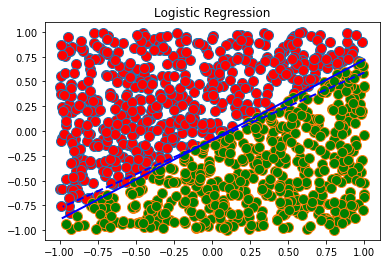

In [19]:
from logistic import logistic, get_err_log

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 1000

E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    w_g = logistic(X[:, :nTrain], y[:, :nTrain]);
    # Compute training, testing error
    # debug    
    feas_train = np.vstack((np.ones((1, nTrain)), X[:, :nTrain]))
    feas_test = np.vstack((np.ones((1, nTest)),X[:, nTrain:]))
    
    E_train += get_err_log(feas_train, y[:, :nTrain], w_g)
    E_test += get_err_log(feas_test, y[:, nTrain:], w_g)
    
E_train, E_test = E_train/nRep, E_test/nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.11669999999999998, E_test is 0.13467000000000007


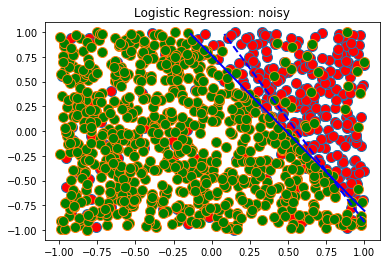

In [15]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 1000; # number of training data

E_train = 0
E_test = 0

for i in range(nRep):
    #X, y, w_f = mkdata(nTrain, 'noisy')
    #w_g = logistic(X, y)
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    w_g = logistic(X[:, :nTrain], y[:, :nTrain]);
    # Compute training, testing error
    feas_train = np.vstack((np.ones((1, nTrain)), X[:, :nTrain]))
    feas_test = np.vstack((np.ones((1, nTest)),X[:, nTrain:]))
    
    E_train += get_err_log(feas_train, y[:, :nTrain], w_g)
    E_test += get_err_log(feas_test, y[:, nTrain:], w_g)
    
E_train, E_test = E_train/nRep, E_test/nRep
    # Compute training, testing error

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.011286999999999991
Average number of support vectors is 3.291.


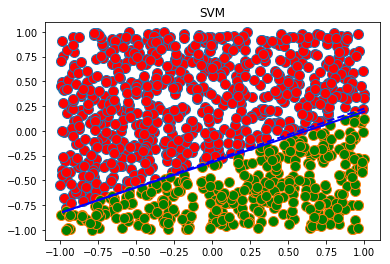

In [6]:
from svm import svm

nRep = 1000; # number of replicates 1000
nTrain = 100; # number of training data 100
nTest = 1000; # number of training data

E_train = 0
E_test = 0
Total_sc_num = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest)
    w_g, num_sc = svm(X[:, :nTrain], y[:, :nTrain])
    #print(w_g, num_sc)
    # Compute training, testing error
    feas_train = np.vstack((np.ones((1, nTrain)), X[:, :nTrain]))
    feas_test = np.vstack((np.ones((1, nTest)),X[:, nTrain:]))
    
    E_train += get_err(feas_train, y[:, :nTrain], w_g)
    E_test += get_err(feas_test, y[:, nTrain:], w_g)
    # Sum up number of support vectors
    Total_sc_num += num_sc

E_train, E_test, avgNum= E_train/nRep, E_test/nRep, Total_sc_num/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

In [9]:
E_train = 0
E_test = 0
Total_sc_num = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain+nTest, 'noisy')
    w_g, num_sc = svm(X[:, :nTrain], y[:, :nTrain])
    #print(w_g, num_sc)
    # Compute training, testing error
    feas_train = np.vstack((np.ones((1, nTrain)), X[:, :nTrain]))
    feas_test = np.vstack((np.ones((1, nTest)),X[:, nTrain:]))
    
    E_train += get_err(feas_train, y[:, :nTrain], w_g)
    E_test += get_err(feas_test, y[:, nTrain:], w_g)
    # Sum up number of support vectors
    Total_sc_num += num_sc

E_train, E_test, avgNum= E_train/nRep, E_test/nRep, Total_sc_num/nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

failed to give the res, for: Positive directional derivative for linesearch


AttributeError: 'NoneType' object has no attribute 'T'

The optimizer I use ('minimize' with 'LinearConstraint') **can not solve** this problem (data with noise)